# Анализ признаков

In [1]:
import warnings
warnings.simplefilter('ignore')
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
PATH='data/'

In [3]:
data=pd.read_csv(PATH+'channels_params.csv',index_col='Index')

In [4]:
def classification(data):
    pass

In [5]:
def save_cls(data,cls_name='test'):
    data.to_csv(PATH+'cp_'+cls_name+'.csv')

In [6]:
#Первые пять строк таблицы с извлечёнными признаками(pd.DataFrame)
data.head(5)

,id,values__abs_energy,values__maximum,values__mean,values__mean_abs_change,values__mean_change,values__median,values__minimum,values__standard_deviation,File,Channel
Index,,,,,,,,,,,
0,11,9.520894e+08,1593.945312,-2.856321,2.667746,0.071268,-0.341797,-1597.216797,218.165793,1.edf,18
1,12,1.769415e+08,424.755859,5.605576,2.140266,0.051987,-0.292969,-1010.058594,93.891698,1.edf,18
2,13,2.369490e+07,248.730469,1.544160,2.102822,-0.013284,-0.585938,-151.416016,34.385468,1.edf,18
3,14,1.252199e+07,99.267578,-0.885730,2.058174,0.003936,-1.806641,-81.640625,25.006296,1.edf,18
4,15,1.299125e+07,99.267578,-0.561738,2.069662,-0.000017,-2.050781,-81.640625,25.480326,1.edf,18


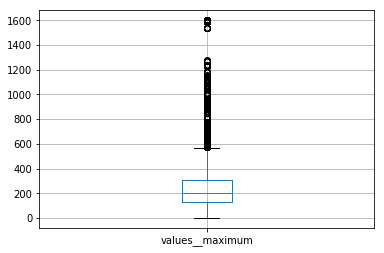

In [7]:
#Распределение максимума на скользящем окне(boxplot)
data.boxplot(column='values__maximum')

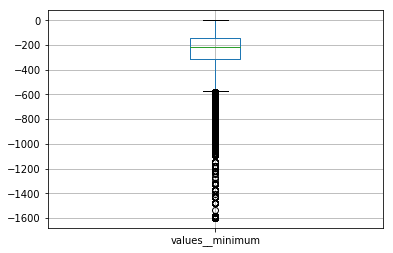

In [8]:
#Распределение минимума на скользящем окне(boxplot)
data.boxplot(column='values__minimum')

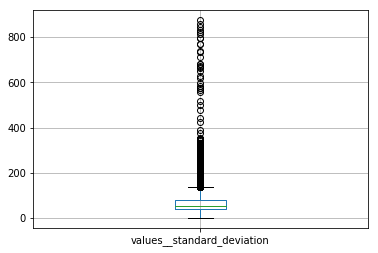

In [9]:
#Распределение стандартного отклонения на скользящем окне(boxplot)
data.boxplot(column='values__standard_deviation')

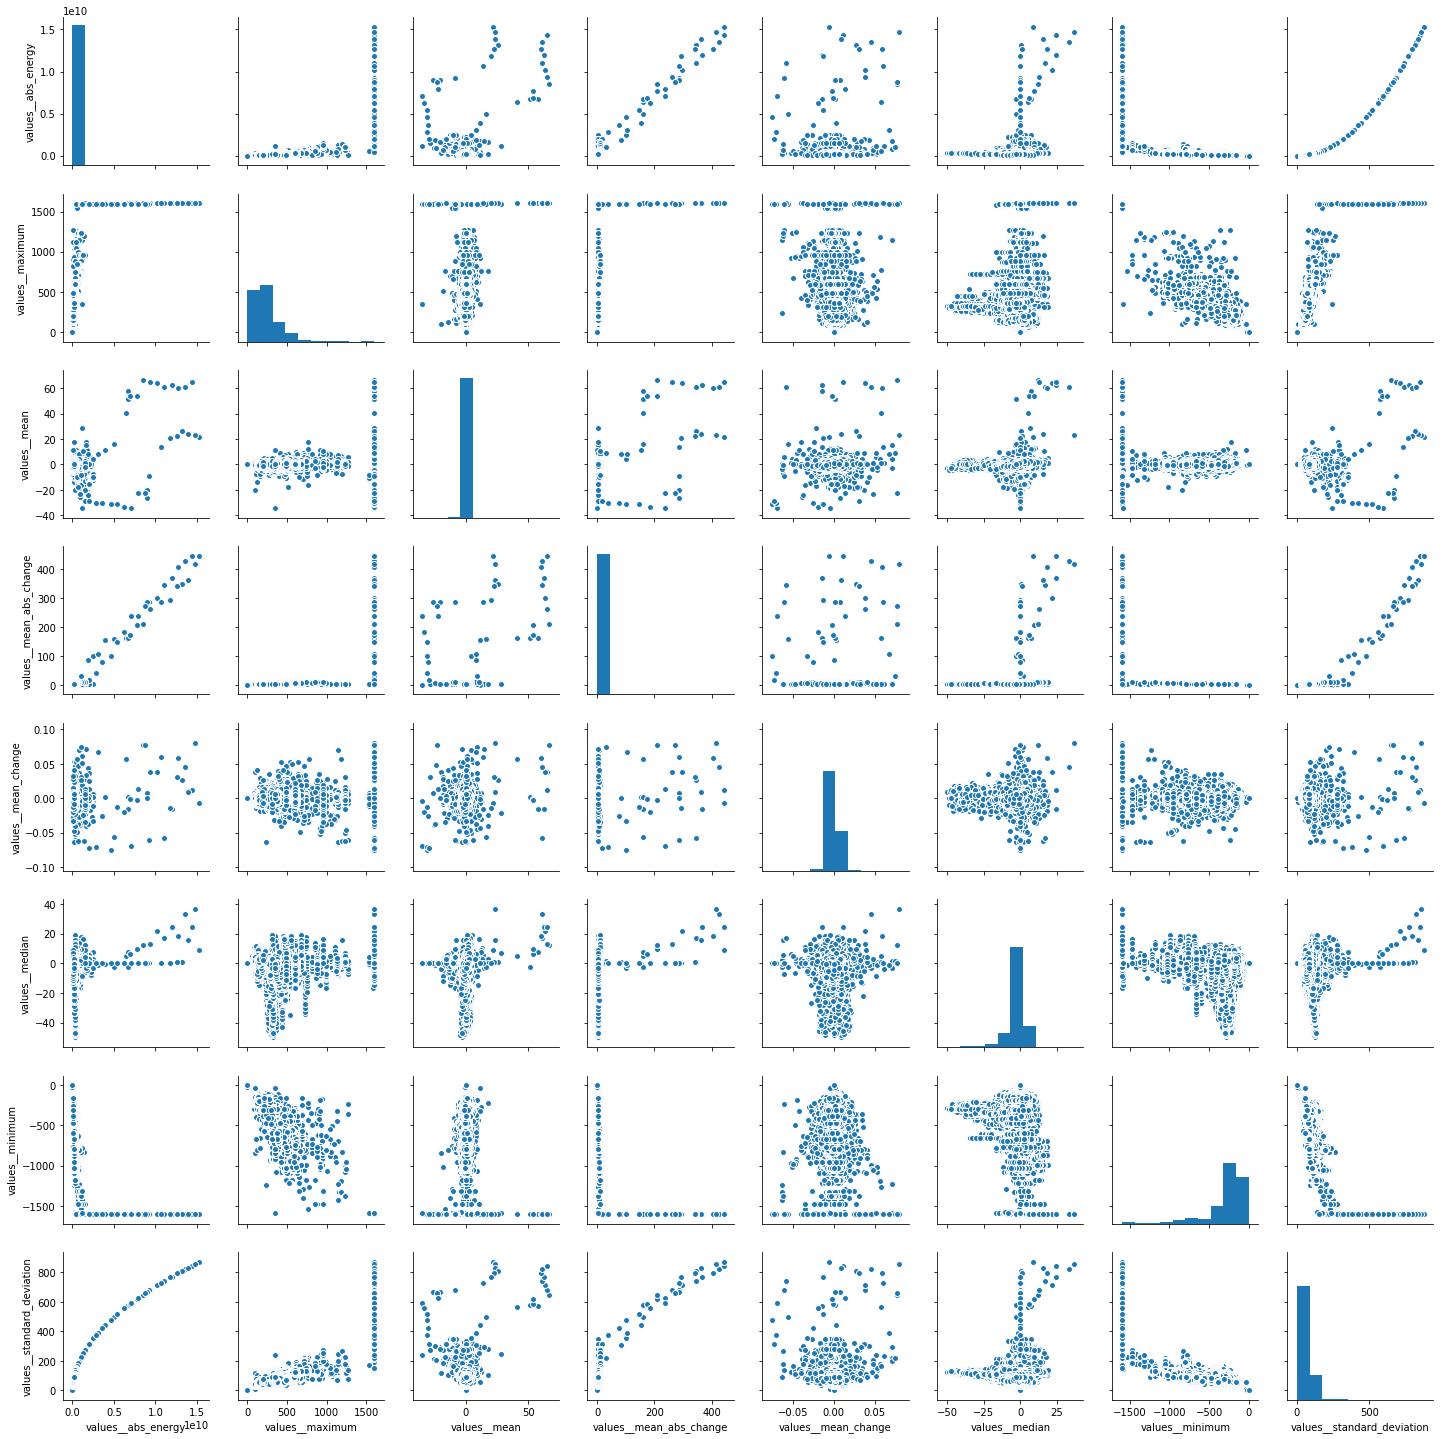

In [10]:
#Диаграммы попарного рассеивания признаков
sns.pairplot(data.drop(['id','Channel'],axis=1))

### Идентифицируем максимумы на окнах находящиеся выше 0.975%%(перцентили) по всей таблице как артефактные зашкалы и посмотрим как поменяется диаграмма рассеивания признаков

In [11]:
quantile=data.quantile([0.025,0.975])
cleardata=data[data['values__maximum']<quantile['values__maximum'][0.975]]

In [12]:
data['Class']=data['values__maximum'].map(lambda x: 1 if x<quantile['values__maximum'][0.975] else 0)

In [13]:
data['Class'].value_counts()

1    37966
0      975
Name: Class, dtype: int64

In [14]:
data.head()

,id,values__abs_energy,values__maximum,values__mean,values__mean_abs_change,values__mean_change,values__median,values__minimum,values__standard_deviation,File,Channel,Class
Index,,,,,,,,,,,,
0,11,9.520894e+08,1593.945312,-2.856321,2.667746,0.071268,-0.341797,-1597.216797,218.165793,1.edf,18,0
1,12,1.769415e+08,424.755859,5.605576,2.140266,0.051987,-0.292969,-1010.058594,93.891698,1.edf,18,1
2,13,2.369490e+07,248.730469,1.544160,2.102822,-0.013284,-0.585938,-151.416016,34.385468,1.edf,18,1
3,14,1.252199e+07,99.267578,-0.885730,2.058174,0.003936,-1.806641,-81.640625,25.006296,1.edf,18,1
4,15,1.299125e+07,99.267578,-0.561738,2.069662,-0.000017,-2.050781,-81.640625,25.480326,1.edf,18,1


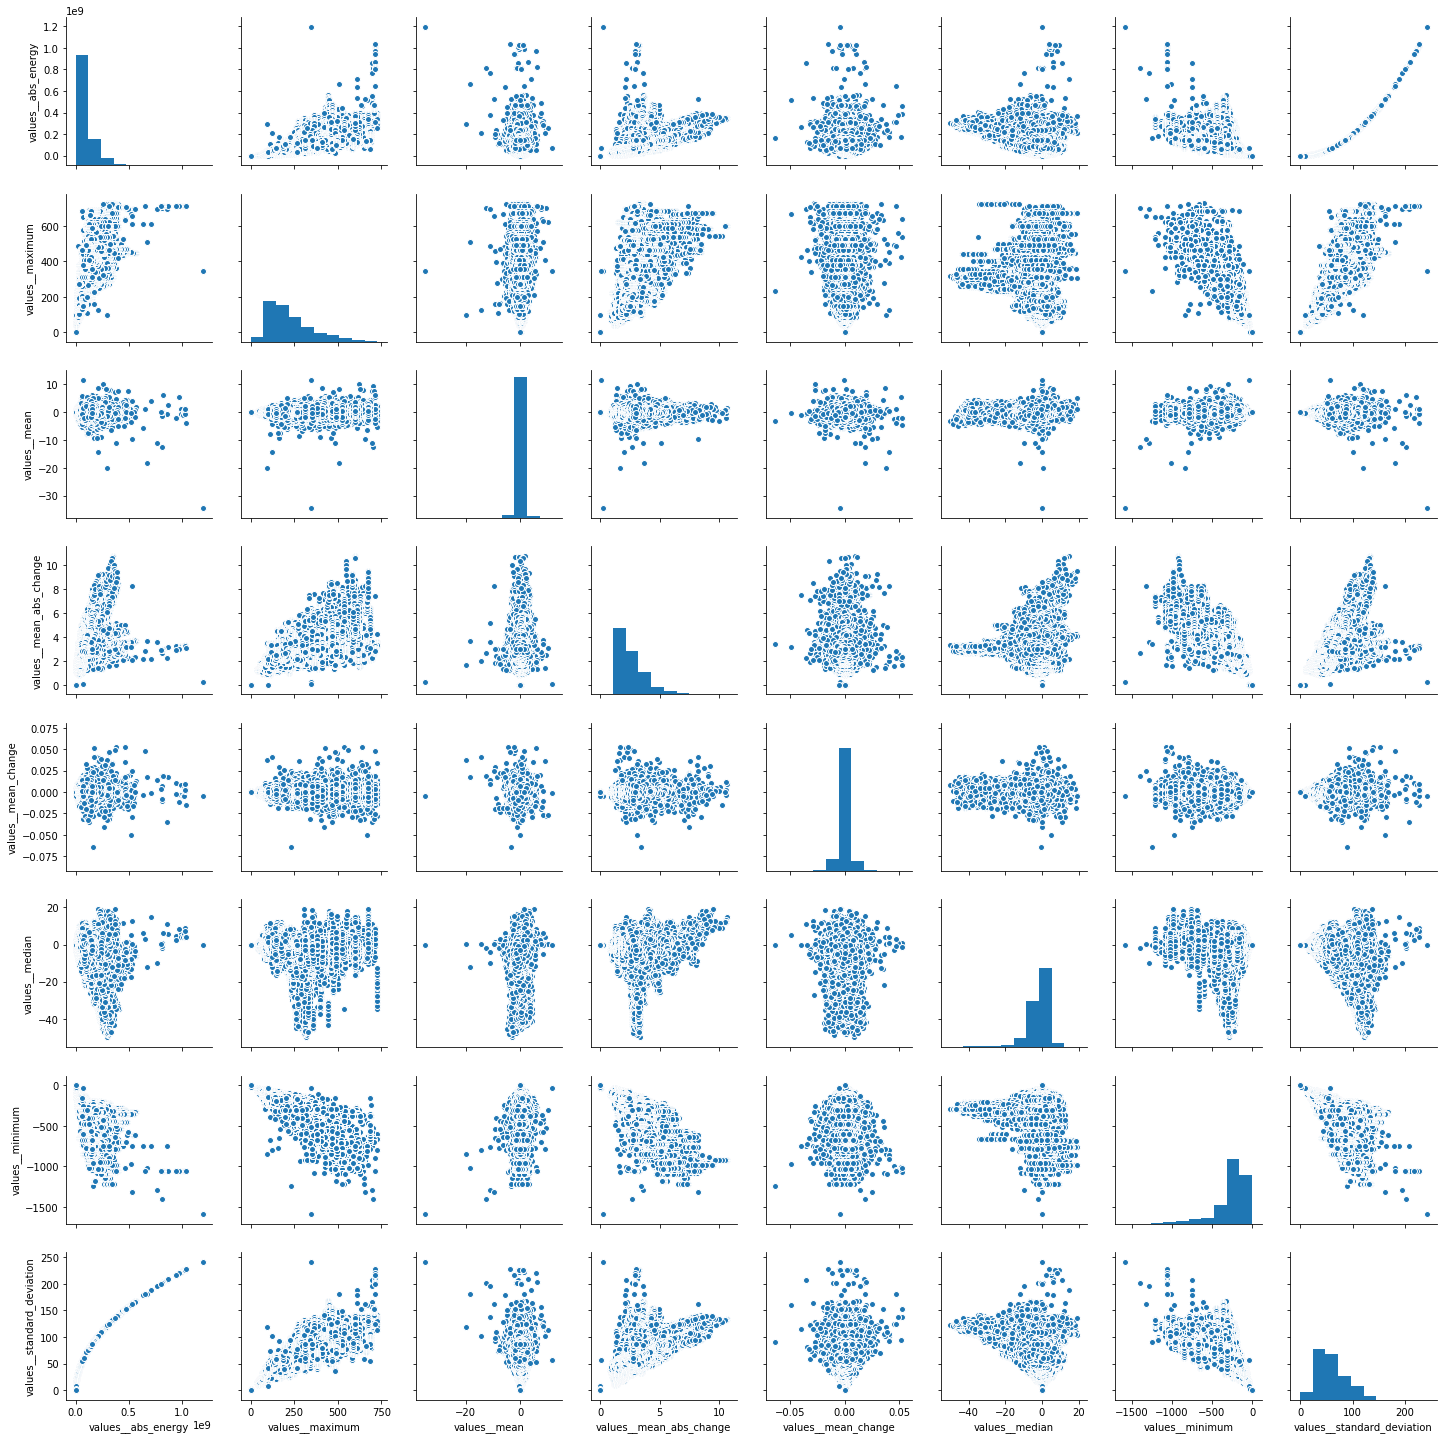

In [15]:
#Диаграмма рассеивания признаков
sns.pairplot(cleardata.drop(['id','Channel'],axis=1))

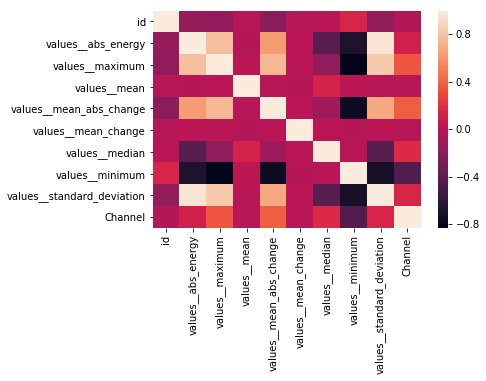

In [16]:
#Цветовая диаграмма корреляции признаков
sns.heatmap(cleardata.corr())

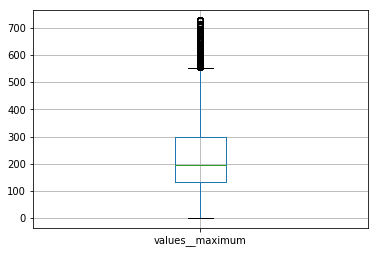

In [17]:
cleardata.boxplot(column='values__maximum')

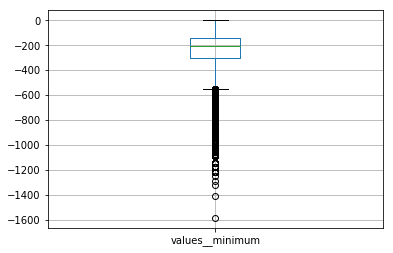

In [18]:
cleardata.boxplot(column='values__minimum')

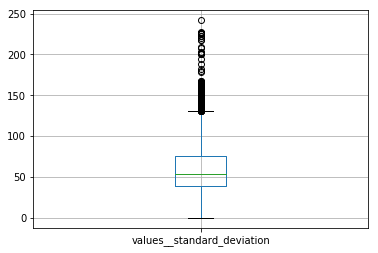

In [19]:
cleardata.boxplot(column='values__standard_deviation')

In [20]:
save_cls(data)